In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from scipy import stats as st
import statsmodels.api as sm

In [2]:
np.set_printoptions(suppress=True)
data = pd.read_csv('Weather.csv', low_memory=False)
data.shape

(119040, 31)

In [3]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


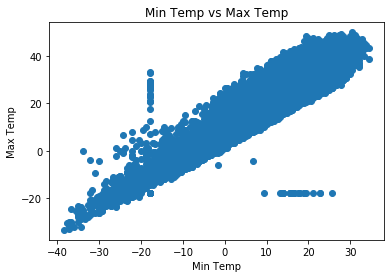

In [4]:
x1 = data['MinTemp']
y1 = data['MaxTemp']
plt.scatter(x1, y1)
plt.xlabel('Min Temp')
plt.ylabel('Max Temp')
plt.title('Min Temp vs Max Temp')
plt.show()

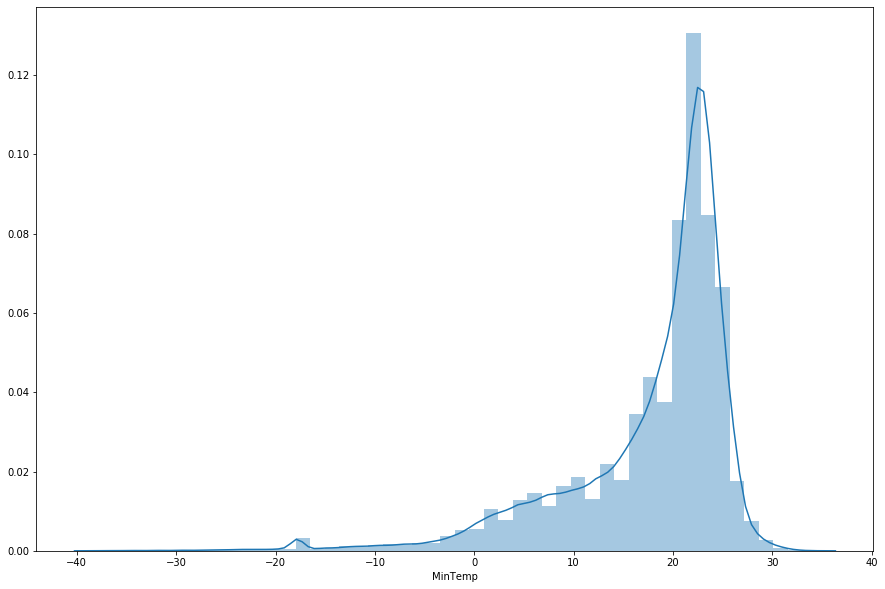

In [5]:
# plot x axis data to visualize data distribution
plt.figure(figsize=(15,10))
plt.tight_layout()
sn.distplot(data['MinTemp'])


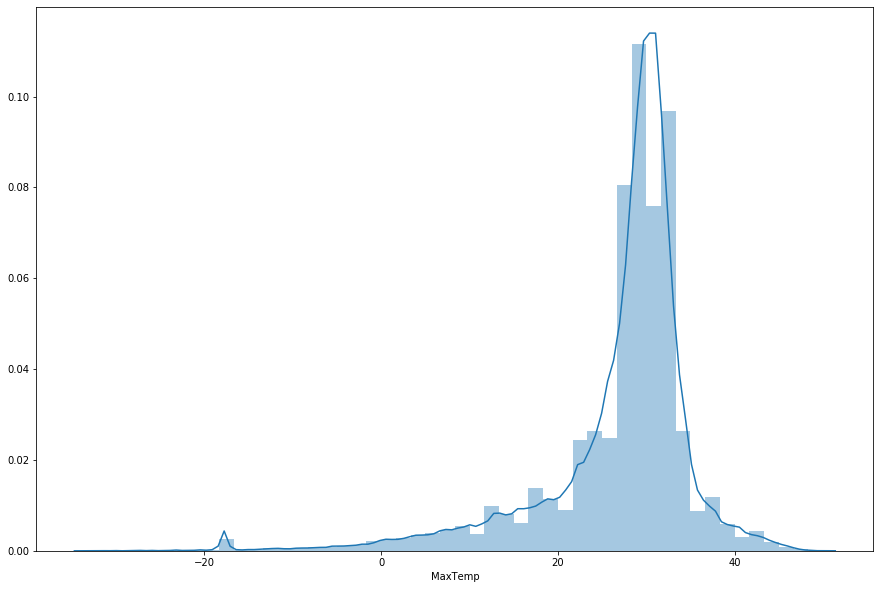

In [6]:
# plot y axis data to visualize data distribution
plt.figure(figsize=(15,10))
plt.tight_layout()
sn.distplot(data['MaxTemp'])

In [7]:
# check for na values
max_temp_na = data['MaxTemp'].isnull().sum()
max_temp_na

0

In [8]:
# check for na values
min_temp_na = data['MinTemp'].isnull().sum()
min_temp_na

0

In [9]:
# reshape data
x1 = x1.values.reshape(-1,1)
y1 = y1.values.reshape(-1,1)
# split data; train - 80, test - 20
x_train, x_test, y_train, y_test = train_test_split(x1, y1, train_size=0.8, random_state=0)

In [10]:
# build the model
simple_reg = LinearRegression()
simple_reg.fit(x_train, y_train)
model_intercept = simple_reg.intercept_
print('model_intercept',model_intercept)
model_slope = simple_reg.coef_
print('model_slope',model_slope)
r_squared = simple_reg.score(x_train, y_train)
print('r_squared',r_squared)
correlation =  np.sqrt(r_squared)
print('correlation',correlation)
standard_error = st.sem(x_train)
print('standard_error',standard_error)
t_statistic = model_slope/standard_error
print ('t-statistic:',t_statistic)
# two_tail_p_value = st.pearsonr(x_train, y_train)
# print('two_tail_p_value:',two_tail_p_value)

# The F-statistic shows whether there is a relationship between the response and the predictor
# I couldn't find a function for this so I have done the calculations by hand
# First get the total sum of the squares.
TSS = y_train
TSS = [i**2 for i in TSS]   # Using list comprehension to square each element
TSS = np.sum(TSS)
# This calculates the residual sum of the squares
y_train_pred = simple_reg.predict(x_train)
y_variance = x_train - y_train_pred # These are the residuals between actual values of Y and the predictions
y_variance = [i**2 for i in y_variance]   # Using list comprehension to square each element
RSS = np.sum(y_variance)
# As we only have one feature the f-statistic formula = ((TSS -RSS)/p)/(RSS/(n - p -1)) becomes
#(TSS - RSS)/(RSS/ (n - 2) )
f_statistic = (TSS - RSS) / (RSS/(np.size(y_train_pred) - 2))
print ('f_statistic:', f_statistic)

model_intercept [10.66185201]
model_slope [[0.92033997]]
r_squared 0.7726816262390883
correlation 0.879023109047247
standard_error [0.02699589]
t-statistic: [[34.09185948]]
f_statistic: 799978.4540076162


In [11]:
# Let's verify the model with stat_model
x = sm.add_constant(x_test)
sm_model = sm.OLS(y_test, x).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 7.842e+04
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:16:19   Log-Likelihood:                -67938.
No. Observations:               23808   AIC:                         1.359e+05
Df Residuals:                   23806   BIC:                         1.359e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8541      0.064    169.794      0.000      10.729      10.979
x1             0.9126      0.003    280.030      0.000       0.906       0.919
==============================================================================
Omnibus:                     2921.633   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24464.910
Skew:                           0.298   Prob(JB):                         0.00
Kurtosis:                       7.930   Cond. No.                         46.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

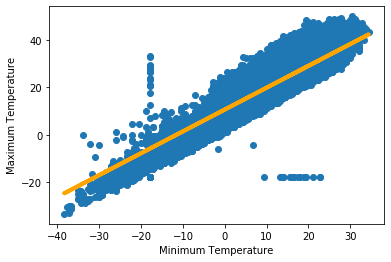

In [12]:
plt.scatter(x_train, y_train)
fig = plt.plot(x_train, y_train_pred, lw = 4, c='orange', label='Regression Line')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x13954b090>,
 'caps': [<matplotlib.lines.Line2D at 0x13954bb90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1395447d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1395545d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x139554b10>],
 'means': []}

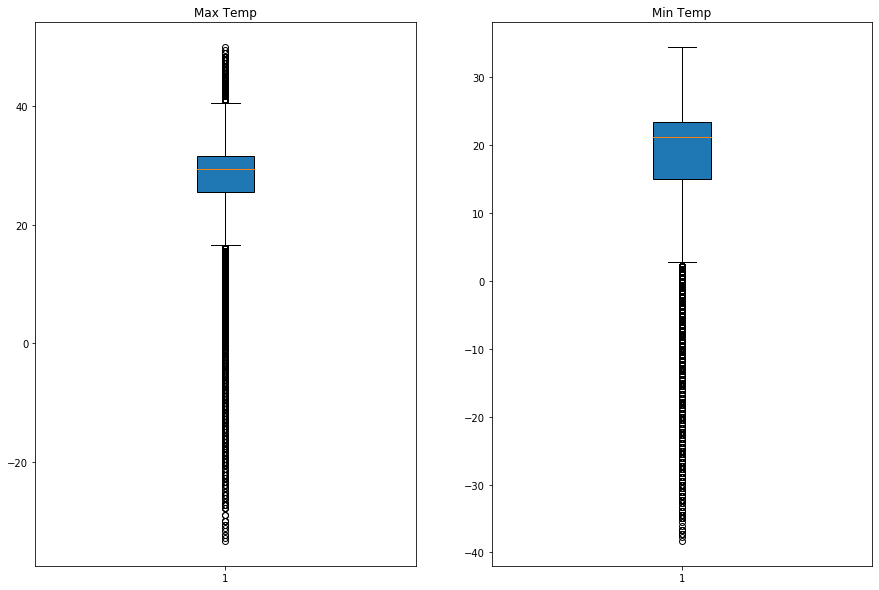

In [13]:
# model looks good but can get better
# let's handle outliers
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Max Temp')
plt.boxplot(y1, patch_artist=True)

plt.subplot(1,2,2)
plt.title('Min Temp')
plt.boxplot(x1, patch_artist=True)

In [14]:
# let's make some predictions on test data
y_pred = simple_reg.predict(x_test)

In [15]:
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


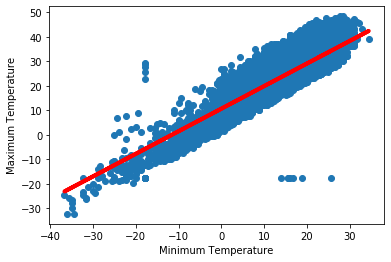

In [16]:
plt.scatter(x_test, y_test)
fig = plt.plot(x_test, y_pred, lw = 4, c='red', label='Regression Line')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.show()

In [17]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('MAE:',MAE)
print('MSE:',MSE)
print('RMSE:',RMSE)


MAE: 3.19932917837853
MSE: 17.631568097568447
RMSE: 4.198996082109204
